In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [2]:
df=pd.read_csv("C:\\Users\\Asus\\OneDrive\\Desktop\\CarPrice_Assignment.csv")

In [3]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
# Step 2: Explore dataset
print(df.head())
print(df.info())
print(df.describe())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [5]:
# Step 3: Data Cleaning
df.dropna(inplace=True)

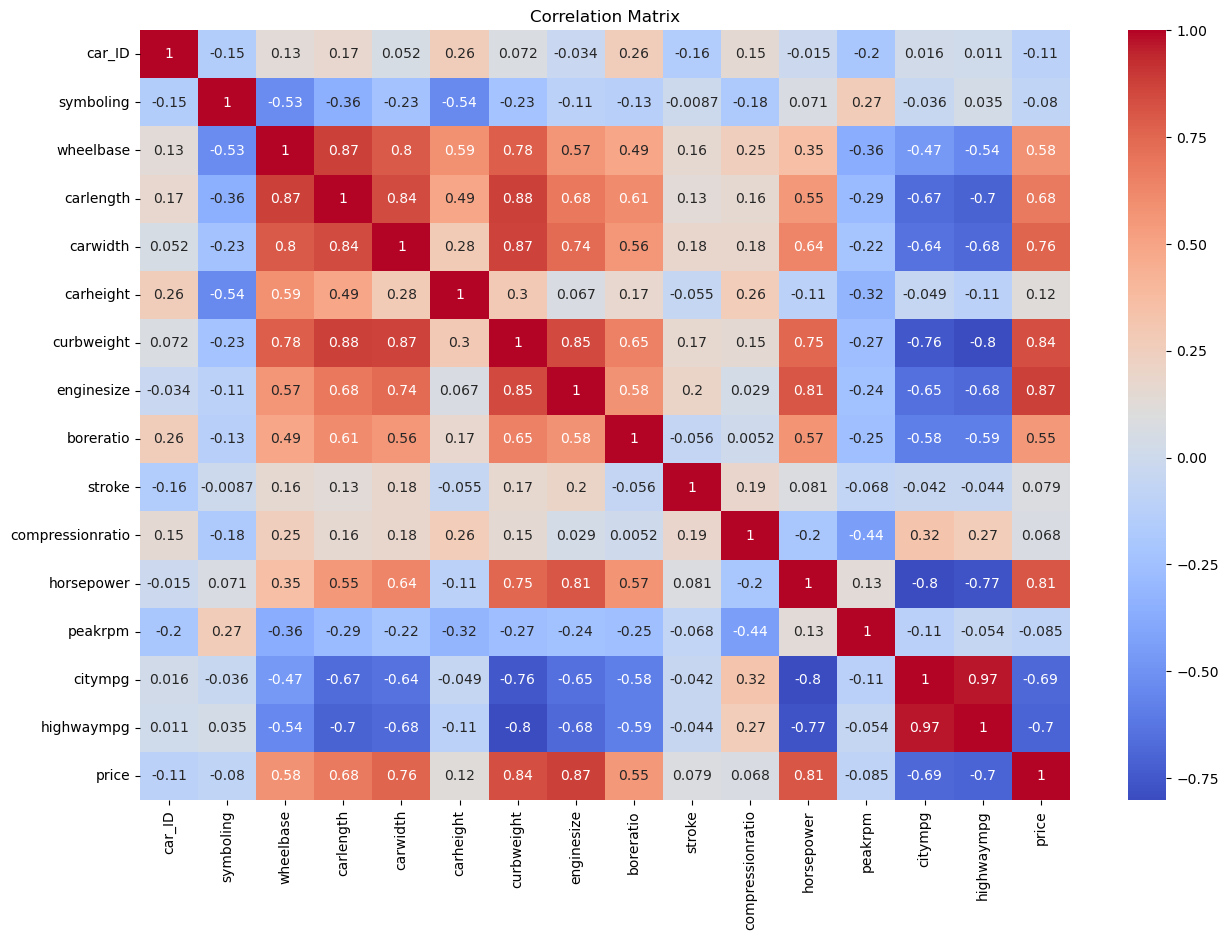

In [6]:
# Step 4: Exploratory Data Analysis (EDA)
# Correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

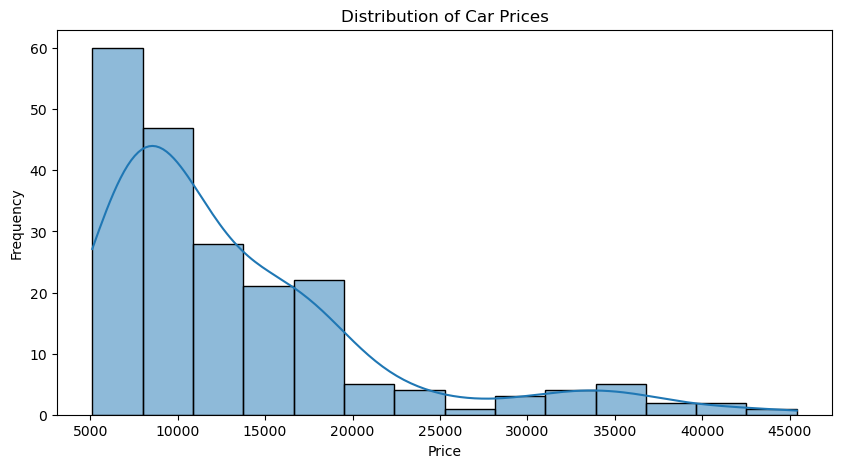

In [7]:
# Distribution of target variable
plt.figure(figsize=(10,5))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

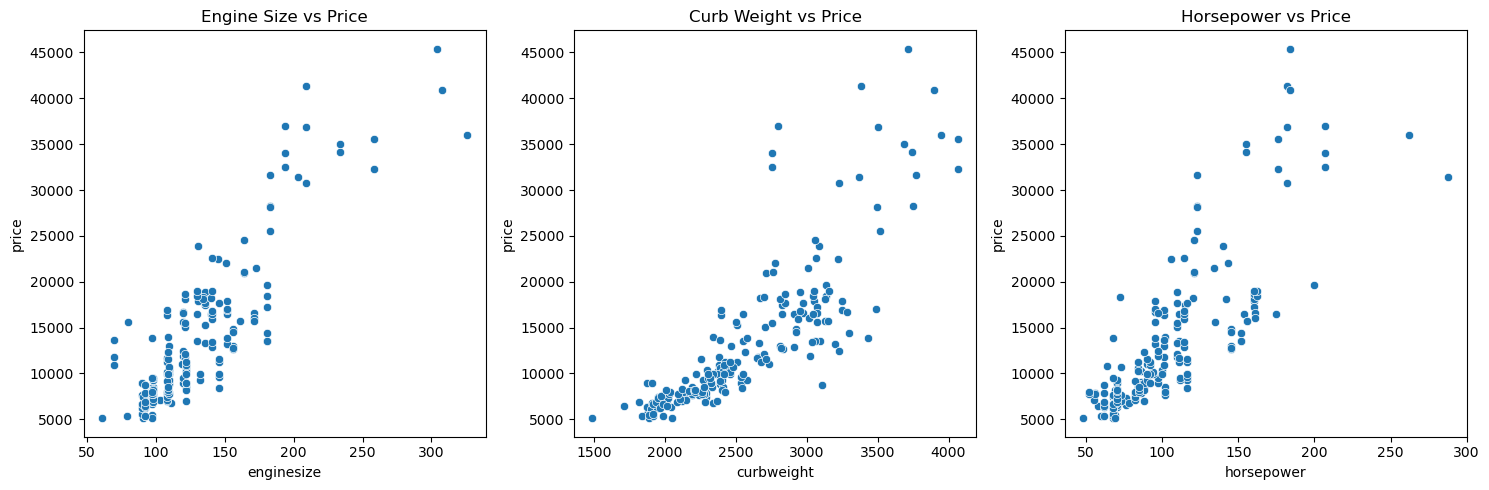

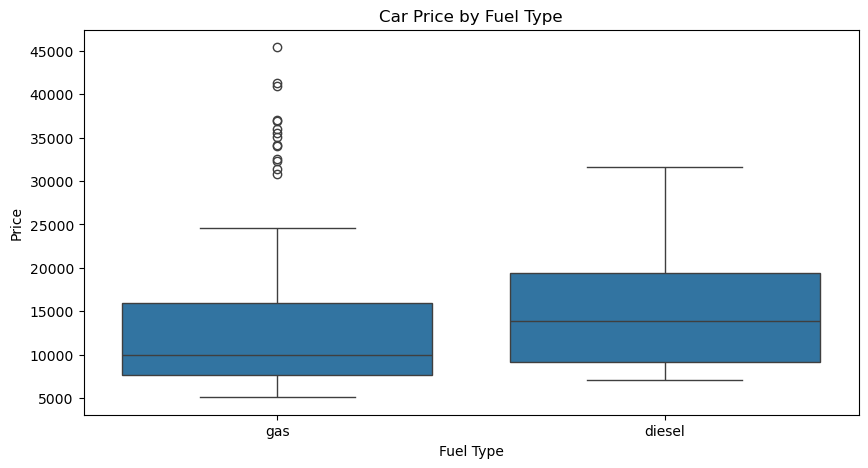

Mean Absolute Error: 1276.3987520325202
Mean Squared Error: 3337152.2701321063
R-squared: 0.9577276121364623


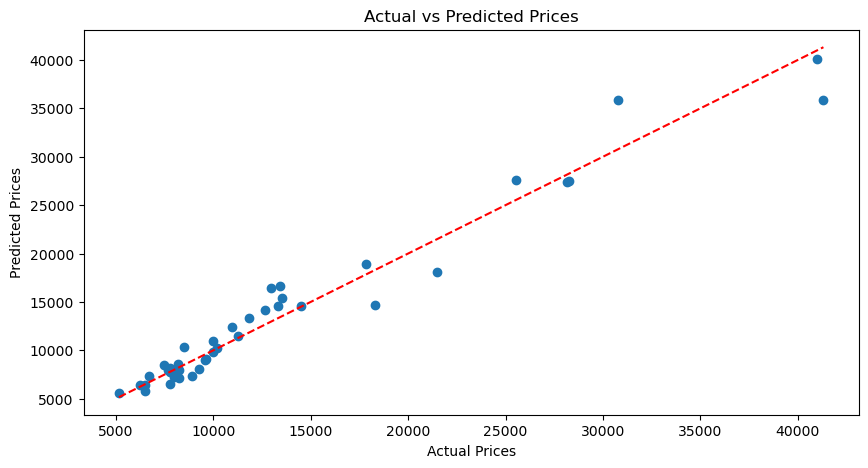

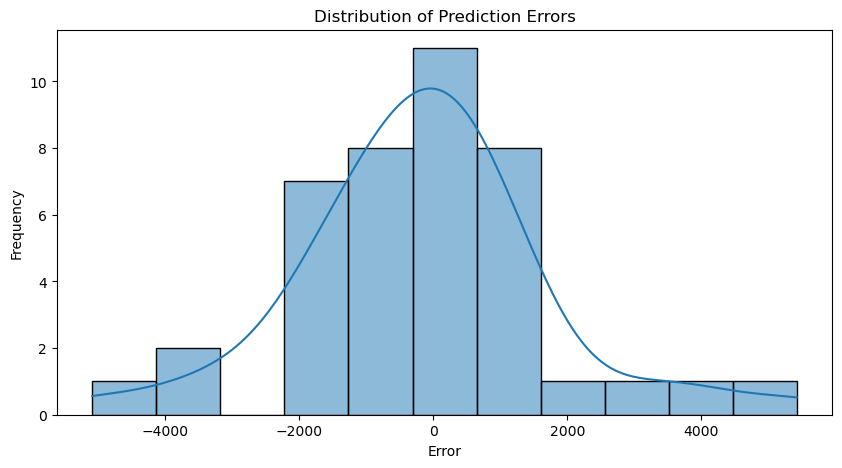

In [8]:
# Relationship between price and some numerical features
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='enginesize', y='price')
plt.title('Engine Size vs Price')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='curbweight', y='price')
plt.title('Curb Weight vs Price')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='horsepower', y='price')
plt.title('Horsepower vs Price')

plt.tight_layout()
plt.show()

# Boxplot of car price by fuel type
plt.figure(figsize=(10,5))
sns.boxplot(x='fueltype', y='price', data=df)
plt.title('Car Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.show()

# Step 5: Data Preprocessing
features = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
            'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 
            'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 
            'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 
            'peakrpm', 'citympg', 'highwaympg']
target = 'price'

X = df[features]
y = df[target]

numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numerical_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ])

# Step 6: Model Training
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

# Step 7: Model Evaluation
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Visualize Actual vs Predicted Prices
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Distribution of prediction errors
errors = y_test - y_pred
plt.figure(figsize=(10,5))
sns.histplot(errors, kde=True)
plt.title('Distribution of Prediction Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()